In [1]:
# creating a dataframe with the training CSV data
import pandas as pd
df = pd.read_csv('drugsComTrain_raw.csv')

In [2]:
# preprocessing the text in the dataframe and creating the model's vocabulary
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stop_words = set(stopwords.words("english"))
vocabulary = [] # holds the unique words from all documents 
documents = [] # processed documents
reg = r"[^\s\w]"
lemmer = WordNetLemmatizer()

# cleaning the data and creating vocabulary
for row in range(df.shape[0]):
    document = []
    for column in range(df.shape[1]):
        data = df.iat[row, column]
        if not isinstance(data, str):
            continue
        data = re.sub(reg, "", data, 0, re.MULTILINE)
        data = word_tokenize(data)
        for word in data:
            if word.casefold not in stop_words and word != "":
                word = word.lower()
                word = ''.join(x for x in word if not x.isdigit())
                word = lemmer.lemmatize(word)
                document.append(word)
    documents.append(document)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Michael\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Michael\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Michael\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Michael\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
# creating bag of words  and tf-idf representations using word document matrix 
import gensim
from gensim import corpora 
from gensim.models import TfidfModel 

vocabulary = corpora.Dictionary(documents)
bow_corpus = [vocabulary.doc2bow(document) for document in documents]
tfidf_model = TfidfModel(bow_corpus, smartirs='ntc')
tfidf_corpus = tfidf_model[bow_corpus]

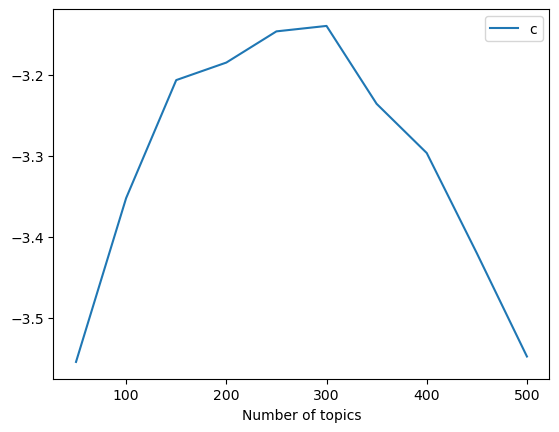

In [4]:
# graphing the coherence values of LSA models to find the optimal number of topics 
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

lsa_models = []
lsa_coherence_vals = []
topics = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for num in topics:
    lsa_model = LsiModel(tfidf_corpus, num_topics=num, id2word=vocabulary)
    lsa_models.append(lsa_model)
    coherence_model = CoherenceModel(model=lsa_model, texts=documents, dictionary=vocabulary, coherence='u_mass')
    lsa_coherence_vals.append(coherence_model.get_coherence())
x = topics
plt.plot(x, lsa_coherence_vals)
plt.xlabel('Number of topics')
plt.ylabel=('Coherence score')
plt.legend(('coherencevals'), loc='best')
plt.show()

In [7]:
# creating the LDA models for the BOW and Tf-Idf representations
from gensim.models import LdaModel

lda_bow_model = LdaModel(corpus=bow_corpus, 
                     id2word=vocabulary, 
                     num_topics=300, 
                     chunksize=2000,
                     passes=10, 
                     alpha='auto',
                     eta='auto',
                     random_state=100,
                     eval_every=1)
lda_tfidf_model = LdaModel(corpus=tfidf_corpus, 
                         id2word=vocabulary, 
                         num_topics=300, 
                         chunksize=2000,
                         passes=10, 
                         alpha='auto',
                         eta='auto',
                         random_state=100,
                         eval_every=1)

In [9]:
# printing the top 10 topics and top 20 words from each topic for each model
lsa_bow_model = LsiModel(bow_corpus, num_topics=300, id2word=vocabulary)
lsa_tfidf_model = lsa_models[5]
print('LSA bow model: ', lsa_bow_model.print_topics(10, 20))
print('LSA tf-idf model: ', lsa_tfidf_model.print_topics(10, 20))
print('LDA bow model: ', lda_bow_model.print_topics(10, 20))
print('LDA tf-idf model: ', lda_tfidf_model.print_topics(10, 20))

LSA bow model:  [(0, '0.569*"i" + 0.314*"and" + 0.300*"the" + 0.251*"a" + 0.237*"to" + 0.231*"it" + 0.213*"my" + 0.207*"" + 0.137*"wa" + 0.136*"for" + 0.124*"of" + 0.123*"have" + 0.098*"on" + 0.090*"in" + 0.090*"this" + 0.087*"but" + 0.085*"had" + 0.080*"me" + 0.077*"that" + 0.076*"is"'), (1, '-0.736*"i" + 0.443*"the" + 0.209*"" + 0.191*"a" + 0.179*"to" + 0.147*"of" + 0.146*"and" + 0.118*"it" + 0.116*"for" + -0.096*"have" + 0.093*"is" + 0.082*"in" + -0.065*"am" + 0.059*"with" + 0.059*"you" + 0.054*"pain" + 0.054*"day" + 0.048*"ive" + 0.043*"me" + 0.036*"on"'), (2, '0.806*"" + -0.439*"it" + -0.261*"the" + 0.102*"day" + 0.080*"mg" + -0.063*"that" + 0.062*"year" + -0.057*"but" + 0.055*"week" + -0.054*"me" + 0.053*"am" + 0.053*"have" + 0.048*"month" + -0.045*"you" + -0.043*"is" + 0.043*"lb" + 0.040*"in" + 0.039*"on" + -0.038*"wa" + 0.038*"at"'), (3, '-0.702*"the" + 0.499*"it" + 0.218*"and" + 0.215*"a" + -0.201*"i" + 0.155*"my" + 0.128*"for" + -0.096*"wa" + -0.084*"of" + 0.079*"me" + 0.070*

In [8]:
lda_bow_likelihood = lda_bow_model.log_perplexity(bow_corpus)
lda_tfidf_likelihood = lda_tfidf_model.log_perplexity(tfidf_corpus)
print('Bag of words log likelihood: ', lda_bow_likelihood)
print('Tf-Idf log likelihood: ', lda_tfidf_likelihood)

Bag of words log likelihood:  -13.958182304409657
Tf-Idf log likelihood:  -600.2839939040567
